In [1]:
try:
    import covid19dh
except:
    !pip install covid19dh
    import covid19dh
from datetime import datetime
try:
    import pandas
except:
    !pip install pandas
    import pandas

In [2]:
dataframe_covid = covid19dh.covid19("TWN",start = datetime(2022,5,1))[0]

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


/home/dreamerwolf/workdirs/venv-3.9-tf-nosite/lib/python3.10/site-packages/covid19dh/_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
/home/dreamerwolf/workdirs/venv-3.9-tf-nosite/lib/python3.10/site-packages/covid19dh/_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)


In [3]:
pandas.set_option('display.max_rows', None)
dataframe_covid[['date','deaths']].diff(periods=1)

,date,deaths
198519,NaT,NaN
198520,1 days,0.0
198521,1 days,8.0
198522,1 days,5.0
198523,1 days,5.0
198524,1 days,10.0
198525,1 days,0.0
198526,1 days,0.0
198527,1 days,35.0
198528,1 days,12.0


198519


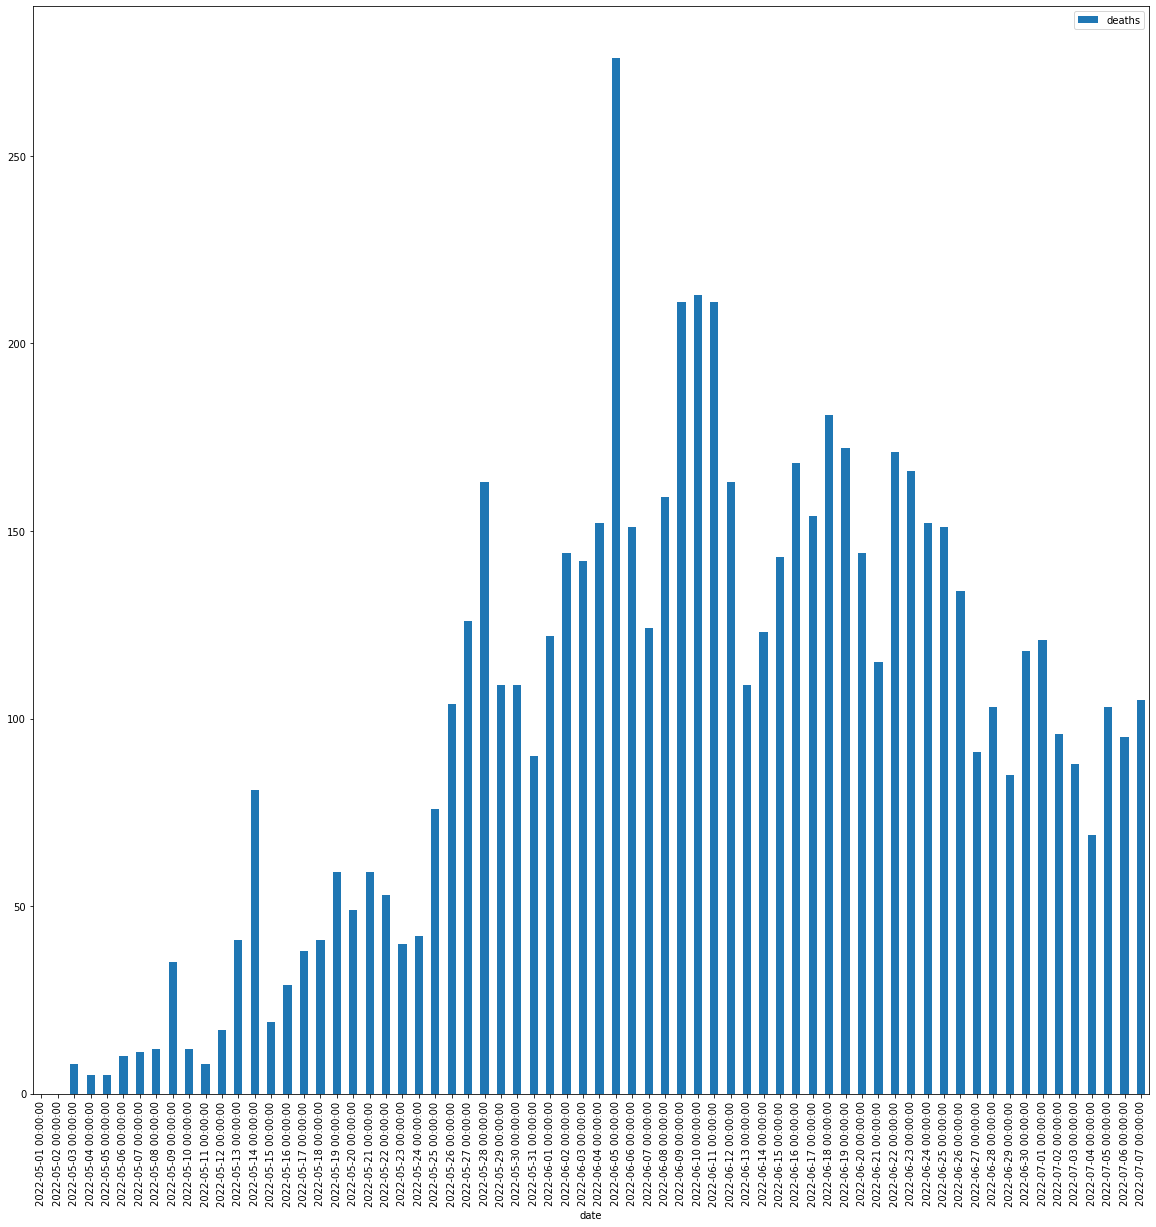

In [4]:
data = {
    'date' : dataframe_covid['date'].to_dict(),
    'deaths' : dataframe_covid['deaths'].diff(periods=1).to_dict()
}
n_df = pandas.DataFrame(data,columns=['date','deaths'])

start_index = dataframe_covid.index.values[0]
print(start_index)
### Fixed report
#2022/05/07 http://at.cdc.tw/940eC5
n_df.loc[start_index+6,['deaths']]=11
#2022/05/08 https://www.cdc.gov.tw/Bulletin/Detail/qSQfMvPB3cooFpj9QfI2WQ?typeid=9
n_df.loc[start_index+7,['deaths']]=12
#2022/05/13 https://www.cdc.gov.tw/Bulletin/Detail/jdZPd_ksulIRROCpqkVp3g?typeid=9
n_df.loc[start_index+12,['deaths']]=41
#2022/06/04 https://www.cdc.gov.tw/Bulletin/Detail/mvkQeeSBlxxuqsfcHCA6zQ?typeid=9
n_df.loc[start_index+34,['deaths']]=152
#2022/07/06 https://www.cdc.gov.tw/Bulletin/Detail/OtHK9XY85EICKq1DzAWH6Q?typeid=9
n_df.loc[start_index+66,['deaths']]=95
#2022/07/07 https://www.cdc.gov.tw/Bulletin/Detail/M6Cs6UCvCKmbhR7CMbYEHA?typeid=9
n_df.loc[start_index+67,['date','deaths']]=[datetime(2022,7,7),105]

### 
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
n_df.plot(x='date',y='deaths',kind='bar',figsize=(20,20))
plt.show()

In [5]:
#死亡率反推感染人數 (以紐西蘭 1/1000 死亡率推算)
print(n_df['deaths']*1000)

198519         NaN
198520         0.0
198521      8000.0
198522      5000.0
198523      5000.0
198524     10000.0
198525     11000.0
198526     12000.0
198527     35000.0
198528     12000.0
198529      8000.0
198530     17000.0
198531     41000.0
198532     81000.0
198533     19000.0
198534     29000.0
198535     38000.0
198536     41000.0
198537     59000.0
198538     49000.0
198539     59000.0
198540     53000.0
198541     40000.0
198542     42000.0
198543     76000.0
198544    104000.0
198545    126000.0
198546    163000.0
198547    109000.0
198548    109000.0
198549     90000.0
198550    122000.0
198551    144000.0
198552    142000.0
198553    152000.0
198554    276000.0
198555    151000.0
198556    124000.0
198557    159000.0
198558    211000.0
198559    213000.0
198560    211000.0
198561    163000.0
198562    109000.0
198563    123000.0
198564    143000.0
198565    168000.0
198566    154000.0
198567    181000.0
198568    172000.0
198569    144000.0
198570    115000.0
198571    17

In [6]:
#
for i in range(start_index,start_index+67) :
    print(n_df['deaths'].loc[i+1]/n_df['deaths'].loc[i])

nan
inf
0.625
1.0
2.0
1.1
1.0909090909090908
2.9166666666666665
0.34285714285714286
0.6666666666666666
2.125
2.411764705882353
1.975609756097561
0.2345679012345679
1.5263157894736843
1.3103448275862069
1.0789473684210527
1.4390243902439024
0.8305084745762712
1.2040816326530612
0.8983050847457628
0.7547169811320755
1.05
1.8095238095238095
1.368421052631579
1.2115384615384615
1.2936507936507937
0.6687116564417178
1.0
0.8256880733944955
1.3555555555555556
1.180327868852459
0.9861111111111112
1.0704225352112675
1.8157894736842106
0.5471014492753623
0.8211920529801324
1.282258064516129
1.3270440251572326
1.009478672985782
0.9906103286384976
0.7725118483412322
0.6687116564417178
1.128440366972477
1.1626016260162602
1.1748251748251748
0.9166666666666666
1.1753246753246753
0.9502762430939227
0.8372093023255814
0.7986111111111112
1.4869565217391305
0.9707602339181286
0.9156626506024096
0.993421052631579
0.8874172185430463
0.6791044776119403
1.1318681318681318
0.8252427184466019
1.38823529411764

/tmp/ipykernel_174125/3211599680.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  print(n_df['deaths'].loc[i+1]/n_df['deaths'].loc[i])


In [7]:
#109每日平均死亡人數
print(17306/366)

47.28415300546448


In [62]:
the_list = []
n_day = 7
for i in range(start_index,start_index+67-n_day) :
    #推測具感染性人數(一週內), n天後發病回報感染後死亡
    weekly_sum = n_df['deaths'].loc[i].sum() 
    daily_enf = n_df['deaths'].loc[i+n_day]
    #死亡增長率粗略推測值
    #print(weekly_sum,daily_enf,daily_enf/weekly_sum)
    the_list.append(daily_enf/weekly_sum)

/tmp/ipykernel_174125/1510387270.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  the_list.append(daily_enf/weekly_sum)


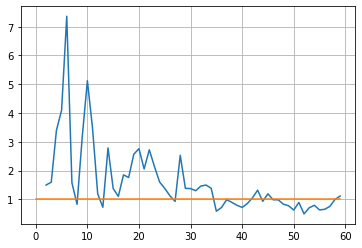

In [63]:
#死亡增長率狀態
x = list(range(0,len(the_list)))
y1 = the_list
y2 = list([1]*len(the_list))
plt.plot(x ,y1, y2)
plt.grid()
plt.show()